# SET UP

In [1]:
# from google.colab import drive
# import os
# drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [1]:
# !pip install ggw
# !pip install POT
# !pip install ipympl

ERROR: Could not find a version that satisfies the requirement ggw (from versions: none)
ERROR: No matching distribution found for ggw


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import math
# !pip install ggw
from ggw import *
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D
%matplotlib widget

# Washington Fire

In [5]:
data_path_train = '/Users/a1/Tugas Vera/Year 4 Fall/MATH 4995/FIRE STATION Washington/Fire_Stations.csv'
df_train_ori = pd.read_csv(data_path_train,encoding='latin-1')
print(df_train_ori.shape)

data_path_test = '/Users/a1/Tugas Vera/Year 4 Fall/MATH 4995/FIRE STATION Washington/Airbnb Listings.csv'
df_test_ori = pd.read_csv(data_path_test,encoding='latin-1')
print(df_test_ori.shape)

(44, 25)
(3723, 17)


#Preprocess


In [6]:
df_train = df_train_ori[['XCOORD','YCOORD']]
df_train_arr = df_train.values

In [7]:
df_train_arr

array([[398441.4 , 135024.88],
       [399281.07, 142329.91],
       [401208.69, 133005.19],
       [397396.45, 137273.24],
       [400873.27, 140493.83],
       [397133.32, 140485.45],
       [400465.33, 135046.96],
       [402864.79, 133752.76],
       [393201.59, 141900.67],
       [396339.34, 139655.95],
       [397694.36, 145055.83],
       [395868.76, 136749.03],
       [397645.62, 142690.14],
       [399932.28, 130595.23],
       [401147.38, 139656.9 ],
       [405118.77, 137271.99],
       [394849.73, 140941.55],
       [391889.17, 138637.3 ],
       [405778.21, 135874.49],
       [393940.33, 142928.75],
       [402485.48, 131648.37],
       [399553.06, 129234.15],
       [400613.58, 141701.41],
       [398190.8 , 134005.4 ],
       [398511.05, 134420.39],
       [397189.88, 138842.23],
       [397396.45, 137273.24],
       [399731.95, 128458.05],
       [403289.84, 139022.37],
       [398603.56, 128084.18],
       [397189.88, 138842.23],
       [395689.55, 137515.07],
       [

In [8]:
df_test = df_test_ori[['longitude','latitude']]
df_test_arr = df_test.values

In [9]:
import random
random.seed(0)

random.shuffle(df_test_arr)
df_test_arr = df_test_arr[:44]
df_test_arr

array([[-77.0028081 ,  38.89004639],
       [-76.99048487,  38.88041282],
       [-76.98600574,  38.95529092],
       [-77.0028081 ,  38.89004639],
       [-77.04154101,  38.99638163],
       [-77.01506201,  38.86248633],
       [-77.01963879,  38.87213388],
       [-76.98600574,  38.95529092],
       [-77.04154101,  38.99638163],
       [-76.96848475,  38.94148563],
       [-76.98600574,  38.95529092],
       [-76.98600574,  38.95529092],
       [-76.96848475,  38.94148563],
       [-76.98600574,  38.95529092],
       [-77.0155379 ,  38.98006671],
       [-77.01963879,  38.87213388],
       [-76.96848475,  38.94148563],
       [-76.99048487,  38.88041282],
       [-77.01071326,  38.97559245],
       [-77.01972979,  38.9839417 ],
       [-77.03090637,  38.99203001],
       [-77.01963879,  38.87213388],
       [-76.98600574,  38.95529092],
       [-77.01071326,  38.97559245],
       [-76.99393298,  38.96183848],
       [-77.01963879,  38.87213388],
       [-77.03090637,  38.99203001],
 

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_train_normalized = scaler.fit_transform(df_train_arr)
data_test_normalized = scaler.fit_transform(df_test_arr)
data_train_normalized
data_test_normalized

array([[ 3.80909456e-01, -1.12606408e+00],
       [ 9.76077227e-01, -1.35867005e+00],
       [ 1.19240298e+00,  4.49287760e-01],
       [ 3.80909456e-01, -1.12606408e+00],
       [-1.48975127e+00,  1.44143723e+00],
       [-2.10910751e-01, -1.79151126e+00],
       [-4.31952713e-01, -1.55856798e+00],
       [ 1.19240298e+00,  4.49287760e-01],
       [-1.48975127e+00,  1.44143723e+00],
       [ 2.03860386e+00,  1.15954233e-01],
       [ 1.19240298e+00,  4.49287760e-01],
       [ 1.19240298e+00,  4.49287760e-01],
       [ 2.03860386e+00,  1.15954233e-01],
       [ 1.19240298e+00,  4.49287760e-01],
       [-2.33894213e-01,  1.04750793e+00],
       [-4.31952713e-01, -1.55856798e+00],
       [ 2.03860386e+00,  1.15954233e-01],
       [ 9.76077227e-01, -1.35867005e+00],
       [-8.81765473e-04,  9.39475181e-01],
       [-4.36347445e-01,  1.14107084e+00],
       [-9.76136314e-01,  1.33636587e+00],
       [-4.31952713e-01, -1.55856798e+00],
       [ 1.19240298e+00,  4.49287760e-01],
       [-8.

In [11]:
# from google.colab import output
# output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

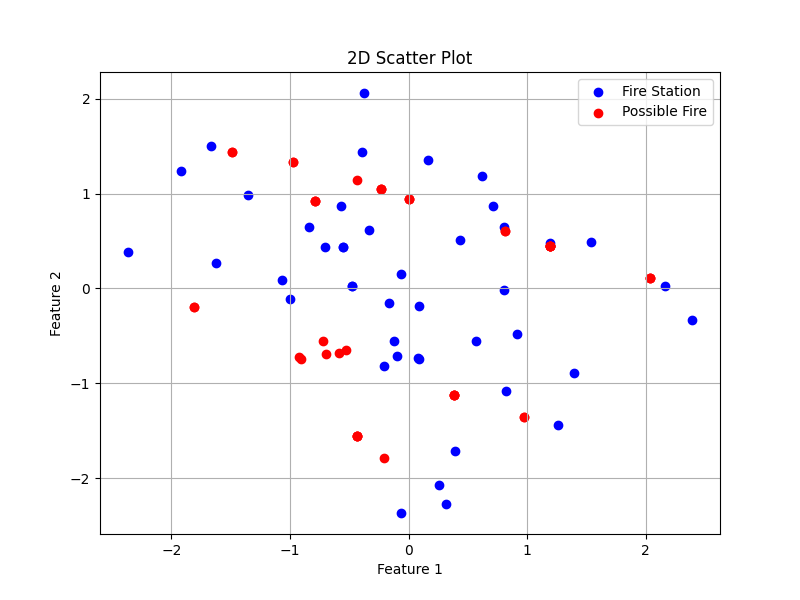

In [12]:
plt.figure(figsize=(8, 6))
# test = np.concatenate((df_train_arr, df_test_arr), axis=0)
plt.scatter(data_train_normalized[:,0],data_train_normalized[:,1], color='blue', marker='o', label='Fire Station')
plt.scatter(data_test_normalized[:,0],data_test_normalized[:,1], color='red', marker='o', label='Possible Fire')
plt.title('2D Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Experiment 1


Iter |Bound gap
----------------------
    0|1.840748e+04
    1|1.836296e+04
    2|1.829435e+04
    3|1.824983e+04
    4|1.722381e+04
    5|1.717929e+04
    6|1.716440e+04
    7|1.711988e+04
    8|1.711068e+04
    9|1.705127e+04
   10|1.686261e+04
   11|1.670496e+04
   12|1.228896e+04
   13|1.105802e+04
   14|1.018735e+04
   15|1.016445e+04
   16|3.415168e+03
   17|3.386624e+03
   18|3.071355e+03
   19|2.968515e+03
   20|2.854135e+03
   21|2.850047e+03
   22|2.699505e+03
   23|2.068208e+03
   24|2.060311e+03
   25|2.044212e+03
   26|1.969987e+03
   27|1.714987e+03
   28|1.619046e+03
   29|1.477379e+03
   30|1.366022e+03
   31|1.311875e+03
   32|1.300168e+03
   33|1.291127e+03
   34|1.161142e+03
   35|9.995361e+02
   36|8.987425e+02
   37|8.937334e+02
   38|8.717539e+02
   39|7.022117e+02
   40|6.871976e+02
   41|6.843242e+02
   42|6.720374e+02
   43|6.566785e+02
   44|6.499617e+02
   45|5.768871e+02
   46|5.082404e+02
   47|5.070769e+02
   48|3.761472e+02
   49|3.401741e+02
   50|3.147

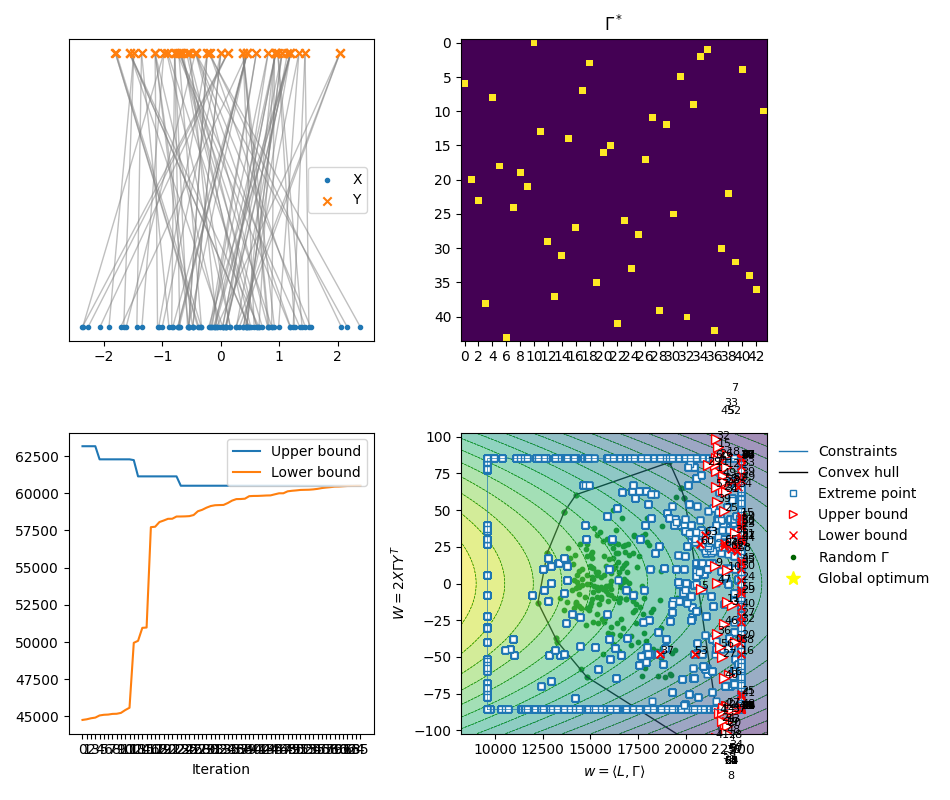

In [13]:
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D

# 1 dim example (INITIALIZE POINTS IN X AND Y)
# np.random.seed(1)
# n = 15
# X = ((np.arange(n)[:,None]/n-0.35)*2)**3 + 0.

# Y = - X + np.random.randn(*X.shape)*np.abs(X)/8
# Y = Y * 1.5
# X = X + np.random.randn(*X.shape)*0.1

# X = X - np.mean(X,axis=0)
# Y = Y - np.mean(Y,axis=0)

X = data_train_normalized
Y = data_test_normalized

# P_ggw = ndarray(nx,ny) Global optimal solution
# logs = log dictionary return only if log==True in parameters
P_ggw,logs = gw_global(X,Y,epsilon=1e-6,verbose=True,IterMax=100,log=True)

# scatter plot X and Y
plt.figure(figsize=(9.5,8))
plt.subplot(2,2,1)
plt.scatter(X,np.zeros_like(X),label='X',alpha=1,marker='.')
plt.scatter(Y,np.ones_like(Y),label='Y',alpha=1,marker='x')

for i in range(len(X)):
    for j in range(len(Y)):
        if P_ggw[i,j]>0:
            plt.plot([X[i],Y[j]],[0,1],color='grey',zorder=-4,linewidth=1,alpha=0.5)
plt.legend()
plt.yticks([])
plt.tight_layout()

# optimization plots with the bounding box and linear constraints
ax4 = plt.subplot(2,2,4)

# BOUNDING BOX
for i,E in enumerate(logs['E_cache']):
    plt.scatter(E[:,0],E[:,1],alpha=1,marker='s',facecolor='white',s=20,label=f'iter {i}',color='C0')

# c_cache.append((lower_bounds,upper_bounds))
for i,c in enumerate(logs['c_cache']):
    if i == 0:
        lower_bounds,upper_bounds=c
        width = upper_bounds[0] - lower_bounds[0]
        height = upper_bounds[1] - lower_bounds[1]
        plt.plot([lower_bounds[0],upper_bounds[0],upper_bounds[0],lower_bounds[0],lower_bounds[0]],[lower_bounds[1],lower_bounds[1],upper_bounds[1],upper_bounds[1],lower_bounds[1]],label='Bounding box',linewidth=0.5,color='C0')
    else:
        A,b=c
        if A[1] == 0:
            plt.plot([b,b],[lower_bounds[1]-0.1*height,upper_bounds[1]+0.1*height],linewidth=0.5,color='C0')
        else:
            x = np.array([lower_bounds[0]-0.1*width,upper_bounds[0]+0.1*width])
            y = (b - A[0] * x)/A[1]
            plt.plot(x,y,linewidth=0.5,color='C0')


plt.xlim(lower_bounds[0]-0.1*width,upper_bounds[0]+0.1*width)
plt.ylim(lower_bounds[1]-0.1*height,upper_bounds[1]+0.1*height)

for i,E0 in enumerate(logs['E0_cache']):
    plt.scatter(E0[0],E0[1],marker='x',s=30,color='red')
    plt.text(E0[0],E0[1],f'{i}',fontsize=8)

L = logs['L']

for i,P in enumerate(logs['Pi_cache'][:-1]):
    W = np.sum(2 * X.T @ P @ Y)
    w = np.sum(L*P)
    plt.scatter(w,W,color='red',marker='>',facecolor='white',s=50)
    plt.text(w,W,f'{i}',fontsize=8)

P = logs['Pi_cache'][-1]
W = np.sum(2 * X.T @ P @ Y)
w = np.sum(L*P)
plt.scatter(w,W,color='yellow',marker='*',facecolor='yellow',s=100,zorder=15)

Ws = [W]
ws = [w]
M = 1000
for _ in range(M):
    n = len(X)
    perm = np.random.permutation(n)
    mat = np.zeros((n, n), dtype=int)
    for i in range(n):
        mat[i, perm[i]] = 1
    P1 = mat
    i = np.random.choice(len(logs['Pi_cache']))
    P = logs['Pi_cache'][i]
    a = (np.random.choice(5)/5)**3
    Pi = (a) * P + (1-a) * P1
    W = np.sum(2 * X.T @ Pi @ Y)
    w = np.sum(L*Pi)
    Ws.append(W)
    ws.append(w)

for _ in range(M):
    n = len(X)
    perm = np.random.permutation(n)
    mat = np.zeros((n, n), dtype=int)
    for i in range(n):
        mat[i, perm[i]] = 1
    Pi = mat
    W = np.sum(2 * X.T @ Pi @ Y)
    w = np.sum(L*Pi)
    Ws.append(W)
    ws.append(w)

points = np.array(list(zip(ws, Ws)))
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], color='k',zorder=-12,linewidth=1)
    plt.scatter(points[simplex, 0], points[simplex, 1],marker='o',s=10,zorder=-15,edgecolors=[(0, 0.5, 0, 1)],facecolors=[(0, 0.5, 0, 1)])

plt.scatter(ws[::10],Ws[::10],marker='o',s=10,zorder=-15,edgecolors=[(0, 0.5, 0, 1)],facecolors=[(0, 0.5, 0, 1)])

x = np.linspace(lower_bounds[0]-0.1*width, upper_bounds[0]+0.1*width, 400)
y = np.linspace(lower_bounds[1]-0.1*height, upper_bounds[1]+0.1*height, 400)
x, y = np.meshgrid(x, y)
z = -x-y**2

plt.contour(x, y, z, levels=20, colors='green', linewidths=0.5,zorder=-5)
plt.contourf(x, y, z, levels=20,zorder=-10,alpha=0.5)

plt.xlabel(r'$w = \langle L,\Gamma \rangle$')
plt.ylabel(r'$W = 2X\Gamma Y^T$')


handles = [
    Line2D([0], [0], color='C0', lw=1, label='Constraints'),
    Line2D([0], [0], color='k', lw=1, label='Convex hull'),
    Line2D([0], [0], marker='s',lw=0,color='C0',markerfacecolor='white',markersize=5, label='Extreme point'),
    Line2D([0], [0], marker='>',lw=0,color='red',markersize=6, markerfacecolor='white',label='Upper bound'),
    Line2D([0], [0], marker='x',lw=0,color='red',markersize=6, label='Lower bound'),
    Line2D([0], [0], marker='o',lw=0,color='darkgreen',markersize=3, label='Random $\Gamma$'),
    Line2D([0], [0], marker='*',lw=0,color='yellow',markersize=10, label='Global optimum')
]

ax4.legend(handles=handles,loc='upper left', bbox_to_anchor=(1,1),frameon=False)
plt.tight_layout()

plt.subplot(2,2,3)
plt.plot(range(logs['niter']),logs['u_cache'],label='Upper bound')
plt.plot(range(logs['niter']),logs['l_cache'],label='Lower bound')
plt.xticks(range(logs['niter']))

plt.xlabel('Iteration')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(2,2,2)
plt.imshow(P_ggw)
plt.xticks(range(0,n,2))
plt.title("$\Gamma^*$")
ax2.set_aspect('auto')
plt.tight_layout()

# Compare Global GW and original GW

Loss(P_ggw) - Loss(P_gw): 0.0000e+00


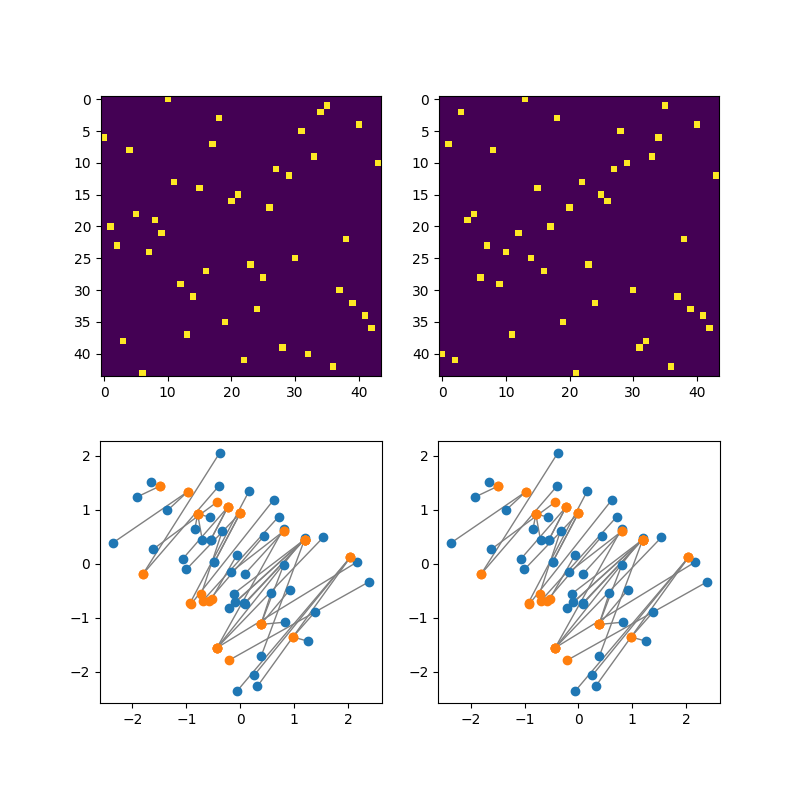

In [14]:
P_ggw,logs = gw_global(X,Y,epsilon=1e-6,verbose=False,log=True)

p = ot.unif(len(X))
q = ot.unif(len(Y))
C1 = ot.dist(X,X)
C2 = ot.dist(Y,Y)
P_gw = ot.gromov.gromov_wasserstein(C1, C2, p, q, 'square_loss', verbose=False, log=False,max_iter=100)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(P_ggw)


plt.subplot(2,2,2)
plt.imshow(P_gw)

plt.subplot(2,2,3)

plt.scatter(X[:,0],X[:,1],alpha=1, label = 'Fire Station')
plt.scatter(Y[:,0],Y[:,1],alpha=1, label = 'Possible Fire')

P = P_ggw

for i in range(len(X)):
    for j in range(len(Y)):
        if P[i,j]>0:
            plt.plot([X[i,0],Y[j,0]],[X[i,1],Y[j,1]],linewidth=P[i,j]/np.max(P),color='grey',zorder=-1)

ax = plt.gca()
ax.set_aspect('equal')

plt.subplot(2,2,4)

plt.scatter(X[:,0],X[:,1],alpha=1, label = 'Fire Station')
plt.scatter(Y[:,0],Y[:,1],alpha=1, label = 'Possible Fire')

P = P_gw

for i in range(len(X)):
    for j in range(len(Y)):
        if P[i,j]>0:
            plt.plot([X[i,0],Y[j,0]],[X[i,1],Y[j,1]],linewidth=P[i,j]/np.max(P),color='grey',zorder=-1)

ax = plt.gca()
ax.set_aspect('equal')

print(f'Loss(P_ggw) - Loss(P_gw): {gw_obj(C1,C2,P_ggw)-gw_obj(C1,C2,P_gw/np.max(P_gw)):.4e}')

# Artificial Data from 2D to 3D

In [15]:
import ot
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Synthetic domain (source)
X_s,_s = make_blobs(n_samples=200, centers=3, n_features=2, random_state=42)
# Real domain (target)
X_t,_t = make_blobs(n_samples=200, centers=3, n_features=3, random_state=24)

# test = np.concatenate((df_train_arr, df_test_arr), axis=0)

##### 2D Scatter Plot
# plt.figure(figsize=(8, 6))
# plt.scatter(X_s[:,0],X_s[:,1], color='blue', marker='o', label='Synthetic')
# plt.scatter(X_t[:,0],X_t[:,1], color='red', marker='o', label='Actual')
# plt.title('2D Scatter Plot')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.grid(True)
# plt.show()

In [16]:
# print(X_s)
# print(X_s[:,0])

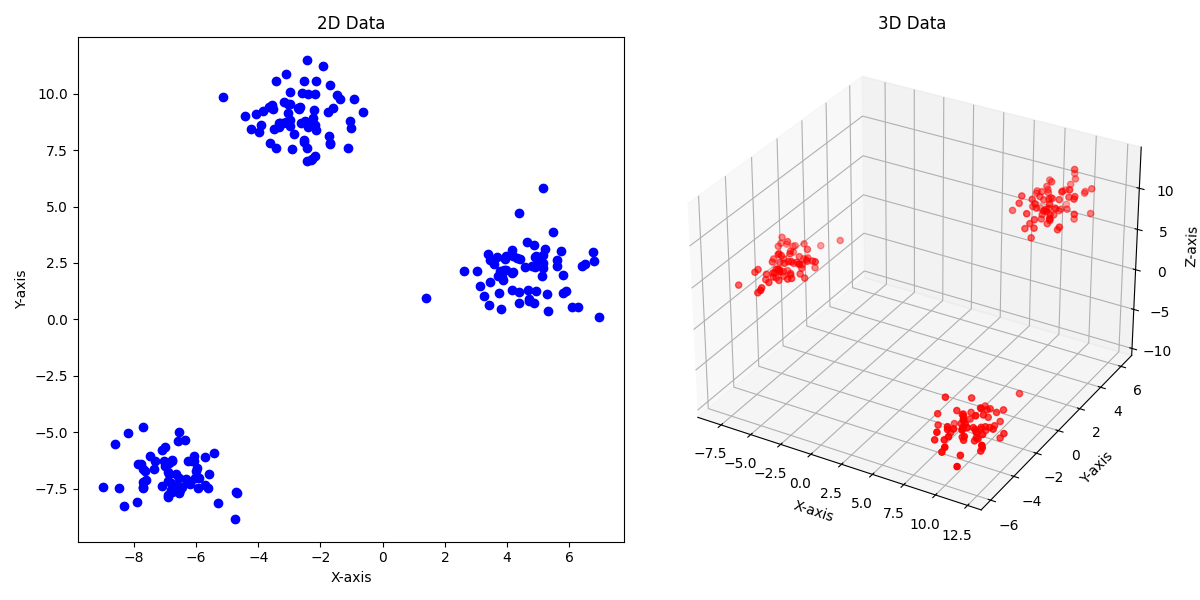

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_s[:,0], X_s[:,1], color='blue')
plt.title('2D Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Subplot for 3D data
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X_t[:,0], X_t[:,1], X_t[:,2], color='red')
ax.set_title('3D Data')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.tight_layout()
plt.show()

Iter |Bound gap
----------------------
    0|1.186529e+09
    1|9.676454e+08
    2|5.919135e+08
    3|5.775847e+08
    4|5.691496e+08
    5|5.371055e+08
    6|5.210775e+08
    7|4.906317e+08
    8|4.531946e+08
    9|4.333549e+08
   10|4.123040e+08
   11|3.610242e+08
   12|3.150726e+08
   13|2.777050e+08
   14|2.206286e+08
   15|1.988582e+08
   16|1.616298e+08
   17|1.307350e+08
   18|1.269923e+08
   19|1.197862e+08
   20|1.040178e+08
   21|9.248931e+07
   22|8.942896e+07
   23|8.431159e+07
   24|7.393110e+07
   25|6.997788e+07
   26|6.767151e+07
   27|5.141184e+07
   28|4.895616e+07
   29|3.181256e+07
   30|2.643847e+07
   31|2.273362e+07
   32|2.023593e+07
   33|2.014225e+07
   34|1.714218e+07
   35|1.259171e+07
   36|7.915512e+06
   37|3.229130e+06
   38|2.611501e+06
   39|1.305533e+06
   40|1.089513e+06
   41|4.407308e+05
   42|2.933281e+05
   43|1.253503e+05
   44|8.669433e+04
   45|1.997528e+04
   46|1.565824e+04
   47|9.353457e+03
   48|1.718325e+03
   49|9.134388e+02
   50|3.708

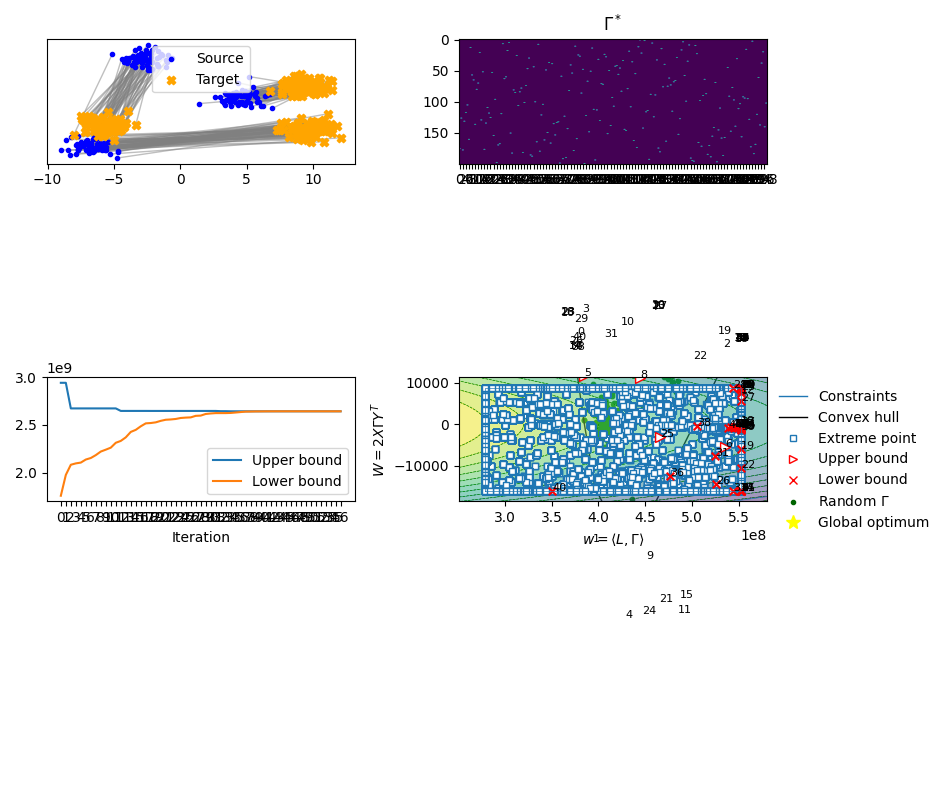

In [18]:
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D

X = X_s
Y = X_t

# P_ggw = ndarray(nx,ny) Global optimal solution
# logs = log dictionary return only if log==True in parameters
P_ggw,logs = gw_global(X,Y,epsilon=1e-6,verbose=True,IterMax=100,log=True)

# scatter plot X and Y
plt.figure(figsize=(9.5,8))
plt.subplot(2,2,1)
# plt.scatter(X,np.zeros_like(X),label='X',alpha=1,marker='.')
# plt.scatter(Y,np.ones_like(Y),label='Y',alpha=1,marker='x')
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Source', marker='.')
plt.scatter(Y[:, 0], Y[:, 1], color='orange', label='Target', marker='X')

for i in range(len(X)):
    for j in range(len(Y)):
        if P_ggw[i,j]>0:
            plt.plot([X[i][0], Y[j][0]], [X[i][1], Y[j][1]],color='gray',zorder=-4,linewidth=1,alpha=0.5)
plt.legend()
plt.yticks([])
plt.tight_layout()

# optimization plots with the bounding box and linear constraints
ax4 = plt.subplot(2,2,4)

# BOUNDING BOX
for i,E in enumerate(logs['E_cache']):
    plt.scatter(E[:,0],E[:,1],alpha=1,marker='s',facecolor='white',s=20,label=f'iter {i}',color='C0')

# c_cache.append((lower_bounds,upper_bounds))
for i,c in enumerate(logs['c_cache']):
    if i == 0:
        lower_bounds,upper_bounds=c
        width = upper_bounds[0] - lower_bounds[0]
        height = upper_bounds[1] - lower_bounds[1]
        plt.plot([lower_bounds[0],upper_bounds[0],upper_bounds[0],lower_bounds[0],lower_bounds[0]],[lower_bounds[1],lower_bounds[1],upper_bounds[1],upper_bounds[1],lower_bounds[1]],label='Bounding box',linewidth=0.5,color='C0')
    else:
        A,b=c
        if A[1] == 0:
            plt.plot([b,b],[lower_bounds[1]-0.1*height,upper_bounds[1]+0.1*height],linewidth=0.5,color='C0')
        else:
            x = np.array([lower_bounds[0]-0.1*width,upper_bounds[0]+0.1*width])
            y = (b - A[0] * x)/A[1]
            plt.plot(x,y,linewidth=0.5,color='C0')


plt.xlim(lower_bounds[0]-0.1*width,upper_bounds[0]+0.1*width)
plt.ylim(lower_bounds[1]-0.1*height,upper_bounds[1]+0.1*height)

for i,E0 in enumerate(logs['E0_cache']):
    plt.scatter(E0[0],E0[1],marker='x',s=30,color='red')
    plt.text(E0[0],E0[1],f'{i}',fontsize=8)

L = logs['L']

for i,P in enumerate(logs['Pi_cache'][:-1]):
    W = np.sum(2 * X.T @ P @ Y)
    w = np.sum(L*P)
    plt.scatter(w,W,color='red',marker='>',facecolor='white',s=50)
    plt.text(w,W,f'{i}',fontsize=8)

P = logs['Pi_cache'][-1]
W = np.sum(2 * X.T @ P @ Y)
w = np.sum(L*P)
plt.scatter(w,W,color='yellow',marker='*',facecolor='yellow',s=100,zorder=15)

Ws = [W]
ws = [w]
M = 1000
for _ in range(M):
    n = len(X)
    perm = np.random.permutation(n)
    mat = np.zeros((n, n), dtype=int)
    for i in range(n):
        mat[i, perm[i]] = 1
    P1 = mat
    i = np.random.choice(len(logs['Pi_cache']))
    P = logs['Pi_cache'][i]
    a = (np.random.choice(5)/5)**3
    Pi = (a) * P + (1-a) * P1
    W = np.sum(2 * X.T @ Pi @ Y)
    w = np.sum(L*Pi)
    Ws.append(W)
    ws.append(w)

for _ in range(M):
    n = len(X)
    perm = np.random.permutation(n)
    mat = np.zeros((n, n), dtype=int)
    for i in range(n):
        mat[i, perm[i]] = 1
    Pi = mat
    W = np.sum(2 * X.T @ Pi @ Y)
    w = np.sum(L*Pi)
    Ws.append(W)
    ws.append(w)

points = np.array(list(zip(ws, Ws)))
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], color='k',zorder=-12,linewidth=1)
    plt.scatter(points[simplex, 0], points[simplex, 1],marker='o',s=10,zorder=-15,edgecolors=[(0, 0.5, 0, 1)],facecolors=[(0, 0.5, 0, 1)])

plt.scatter(ws[::10],Ws[::10],marker='o',s=10,zorder=-15,edgecolors=[(0, 0.5, 0, 1)],facecolors=[(0, 0.5, 0, 1)])

x = np.linspace(lower_bounds[0]-0.1*width, upper_bounds[0]+0.1*width, 400)
y = np.linspace(lower_bounds[1]-0.1*height, upper_bounds[1]+0.1*height, 400)
x, y = np.meshgrid(x, y)
z = -x-y**2

plt.contour(x, y, z, levels=20, colors='green', linewidths=0.5,zorder=-5)
plt.contourf(x, y, z, levels=20,zorder=-10,alpha=0.5)

plt.xlabel(r'$w = \langle L,\Gamma \rangle$')
plt.ylabel(r'$W = 2X\Gamma Y^T$')


handles = [
    Line2D([0], [0], color='C0', lw=1, label='Constraints'),
    Line2D([0], [0], color='k', lw=1, label='Convex hull'),
    Line2D([0], [0], marker='s',lw=0,color='C0',markerfacecolor='white',markersize=5, label='Extreme point'),
    Line2D([0], [0], marker='>',lw=0,color='red',markersize=6, markerfacecolor='white',label='Upper bound'),
    Line2D([0], [0], marker='x',lw=0,color='red',markersize=6, label='Lower bound'),
    Line2D([0], [0], marker='o',lw=0,color='darkgreen',markersize=3, label='Random $\Gamma$'),
    Line2D([0], [0], marker='*',lw=0,color='yellow',markersize=10, label='Global optimum')
]

ax4.legend(handles=handles,loc='upper left', bbox_to_anchor=(1,1),frameon=False)
plt.tight_layout()

plt.subplot(2,2,3)
plt.plot(range(logs['niter']),logs['u_cache'],label='Upper bound')
plt.plot(range(logs['niter']),logs['l_cache'],label='Lower bound')
plt.xticks(range(logs['niter']))

plt.xlabel('Iteration')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(2,2,2)
plt.imshow(P_ggw)
plt.xticks(range(0,n,2))
plt.title("$\Gamma^*$")
ax2.set_aspect('auto')
plt.tight_layout()

Iter |Bound gap
----------------------
    0|1.186529e+09
    1|9.676454e+08
    2|5.919135e+08
    3|5.775847e+08
    4|5.691496e+08
    5|5.371055e+08
    6|5.210775e+08
    7|4.906317e+08
    8|4.531946e+08
    9|4.333549e+08
   10|4.123040e+08
   11|3.610242e+08
   12|3.150726e+08
   13|2.777050e+08
   14|2.206286e+08
   15|1.988582e+08
   16|1.616298e+08
   17|1.307350e+08
   18|1.269923e+08
   19|1.197862e+08
   20|1.040178e+08
   21|9.248931e+07
   22|8.942896e+07
   23|8.431159e+07
   24|7.393110e+07
   25|6.997788e+07
   26|6.767151e+07
   27|5.141184e+07
   28|4.895616e+07
   29|3.181256e+07
   30|2.643847e+07
   31|2.273362e+07
   32|2.023593e+07
   33|2.014225e+07
   34|1.714218e+07
   35|1.259171e+07
   36|7.915512e+06
   37|3.229130e+06
   38|2.611501e+06
   39|1.305533e+06
   40|1.089513e+06
   41|4.407308e+05
   42|2.933281e+05
   43|1.253503e+05
   44|8.669433e+04
   45|1.997528e+04
   46|1.565824e+04
   47|9.353457e+03
   48|1.718325e+03
   49|9.134388e+02
   50|3.708

([], [])

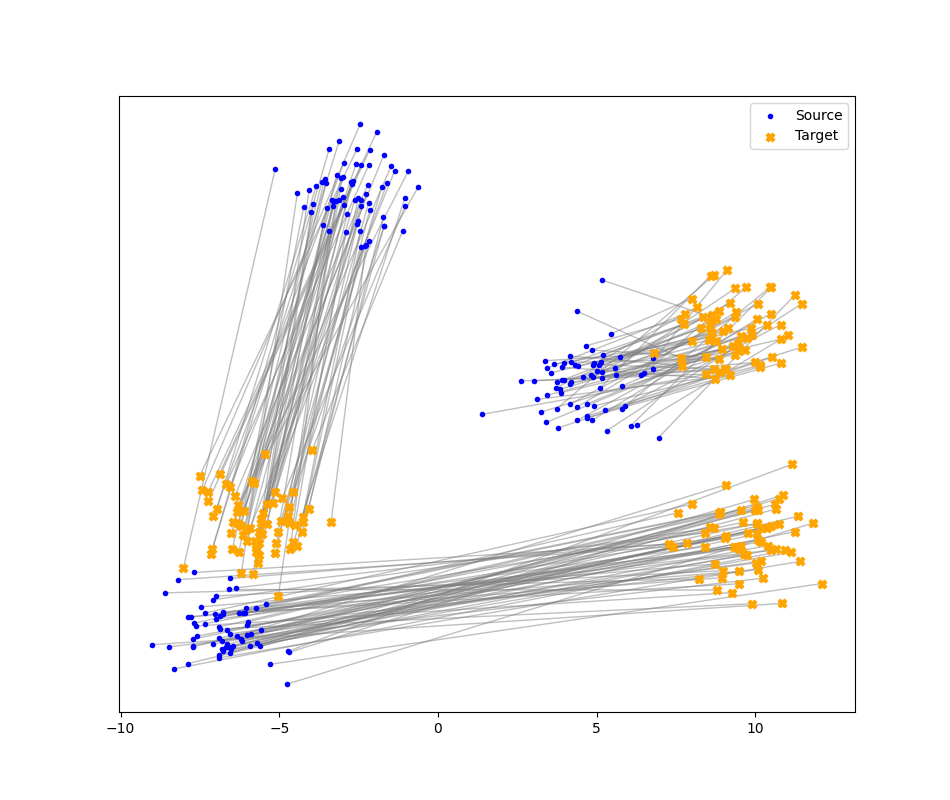

In [19]:
#### Zoomed in Diagram

X = X_s
Y = X_t

# P_ggw = ndarray(nx,ny) Global optimal solution
# logs = log dictionary return only if log==True in parameters
P_ggw,logs = gw_global(X,Y,epsilon=1e-6,verbose=True,IterMax=100,log=True)

# scatter plot X and Y
plt.figure(figsize=(9.5,8))
# plt.subplot(2,2,1)
# plt.scatter(X,np.zeros_like(X),label='X',alpha=1,marker='.')
# plt.scatter(Y,np.ones_like(Y),label='Y',alpha=1,marker='x')
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Source', marker='.')
plt.scatter(Y[:, 0], Y[:, 1], color='orange', label='Target', marker='X')

for i in range(len(X)):
    for j in range(len(Y)):
        if P_ggw[i,j]>0:
            plt.plot([X[i][0], Y[j][0]], [X[i][1], Y[j][1]],color='gray',zorder=-4,linewidth=1,alpha=0.5)
plt.legend()
plt.yticks([])



Compare Global GW and Original GW

Loss(P_ggw) - Loss(P_gw): 0.0000e+00


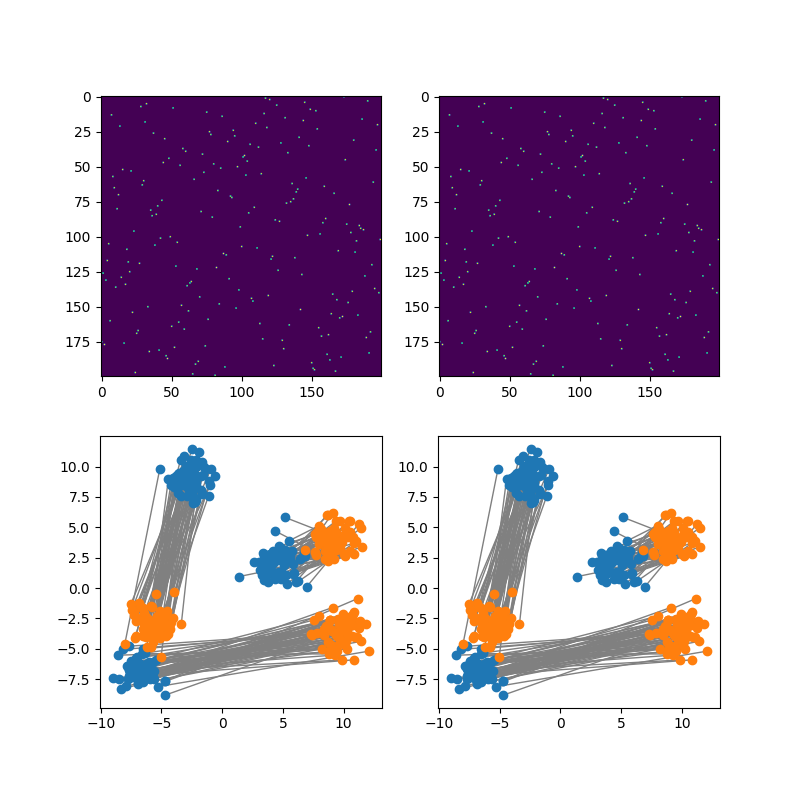

In [20]:
P_ggw,logs = gw_global(X,Y,epsilon=1e-6,verbose=False,log=True)

p = ot.unif(len(X))
q = ot.unif(len(Y))
C1 = ot.dist(X,X)
C2 = ot.dist(Y,Y)
P_gw = ot.gromov.gromov_wasserstein(C1, C2, p, q, 'square_loss', verbose=False, log=False,max_iter=100)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(P_ggw)


plt.subplot(2,2,2)
plt.imshow(P_gw)

plt.subplot(2,2,3)

plt.scatter(X[:,0],X[:,1],alpha=1)
plt.scatter(Y[:,0],Y[:,1],alpha=1)

P = P_ggw

for i in range(len(X)):
    for j in range(len(Y)):
        if P[i,j]>0:
            plt.plot([X[i,0],Y[j,0]],[X[i,1],Y[j,1]],linewidth=P[i,j]/np.max(P),color='grey',zorder=-1)

ax = plt.gca()
ax.set_aspect('equal')

plt.subplot(2,2,4)

plt.scatter(X[:,0],X[:,1],alpha=1)
plt.scatter(Y[:,0],Y[:,1],alpha=1)

P = P_gw

for i in range(len(X)):
    for j in range(len(Y)):
        if P[i,j]>0:
            plt.plot([X[i,0],Y[j,0]],[X[i,1],Y[j,1]],linewidth=P[i,j]/np.max(P),color='grey',zorder=-1)

ax = plt.gca()
ax.set_aspect('equal')

print(f'Loss(P_ggw) - Loss(P_gw): {gw_obj(C1,C2,P_ggw)-gw_obj(C1,C2,P_gw/np.max(P_gw)):.4e}')

Compare computation time

Iter |Bound gap
----------------------
    0|1.186529e+09
    1|9.676454e+08
    2|5.919135e+08
    3|5.775847e+08
    4|5.691496e+08
    5|5.371055e+08
    6|5.210775e+08
    7|4.906317e+08
    8|4.531946e+08
    9|4.333549e+08
   10|4.123040e+08
   11|3.610242e+08
   12|3.150726e+08
   13|2.777050e+08
   14|2.206286e+08
   15|1.988582e+08
   16|1.616298e+08
   17|1.307350e+08
   18|1.269923e+08
   19|1.197862e+08
   20|1.040178e+08
   21|9.248931e+07
   22|8.942896e+07
   23|8.431159e+07
   24|7.393110e+07
   25|6.997788e+07
   26|6.767151e+07
   27|5.141184e+07
   28|4.895616e+07
   29|3.181256e+07
   30|2.643847e+07
   31|2.273362e+07
   32|2.023593e+07
   33|2.014225e+07
   34|1.714218e+07
   35|1.259171e+07
   36|7.915512e+06
   37|3.229130e+06
   38|2.611501e+06
   39|1.305533e+06
   40|1.089513e+06
   41|4.407308e+05
   42|2.933281e+05
   43|1.253503e+05
   44|8.669433e+04
   45|1.997528e+04
   46|1.565824e+04
   47|9.353457e+03
   48|1.718325e+03
   49|9.134388e+02
   50|3.708

([], [])

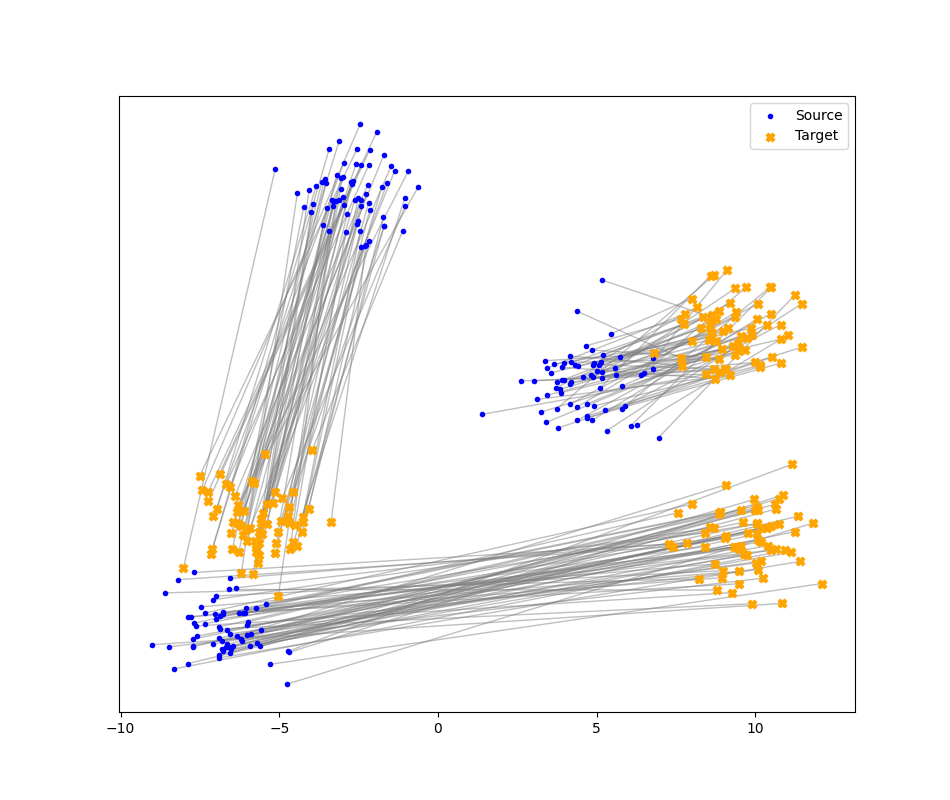

In [29]:
#### Zoomed in Diagram

X = X_s
Y = X_t

# P_ggw = ndarray(nx,ny) Global optimal solution
# logs = log dictionary return only if log==True in parameters
P_ggw_modified,logs_modified = gw_global_testing(X,Y,epsilon=1e-6,verbose=True,IterMax=500,log=True)

# scatter plot X and Y
plt.figure(figsize=(9.5,8))
# plt.subplot(2,2,1)
# plt.scatter(X,np.zeros_like(X),label='X',alpha=1,marker='.')
# plt.scatter(Y,np.ones_like(Y),label='Y',alpha=1,marker='x')
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Source', marker='.')
plt.scatter(Y[:, 0], Y[:, 1], color='orange', label='Target', marker='X')

for i in range(len(X)):
    for j in range(len(Y)):
        if P_ggw[i,j]>0:
            plt.plot([X[i][0], Y[j][0]], [X[i][1], Y[j][1]],color='gray',zorder=-4,linewidth=1,alpha=0.5)
plt.legend()
plt.yticks([])



In [30]:
print("Computation time used in Global GW (algorithm 1): ",sum(logs['time_cache']))

print("Computation time used in Modified Global GW (modified algorithm): ",sum(logs_modified['time_cache']))

Computation time used in Global GW (algorithm 1):  0.836761474609375
Computation time used in Modified Global GW (modified algorithm):  0.792569637298584
